# SUPERVISED LEARNING

# **Title: An exploration of a retail Dataset via multclass classification** 

Description:
Transaction ID: A unique identifier for each transaction, allowing tracking and reference.

Date: The date when the transaction occurred, providing insights into sales trends over time.

Customer ID: A unique identifier for each customer, enabling customer-centric analysis.

Gender: The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

Age: The age of the customer, facilitating segmentation and exploration of age-related influences.

Product Category: The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

Quantity: The number of units of the product purchased, contributing to insights on purchase volumes.

Price per Unit: The price of one unit of the product, aiding in calculations related to total spending.

Total Amount: The total monetary value of the transaction, showcasing the financial impact of each purchase.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [123]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
df = pd.read_csv("C:/Users/USER/Downloads/retail_sales_dataset.csv")

In [125]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [126]:
df.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


## Dataset description for Numerical features

In [128]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Dataset description for categorical features

In [129]:
df.describe(include="object")

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


In [130]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [131]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

# Exploratory Data Analysis

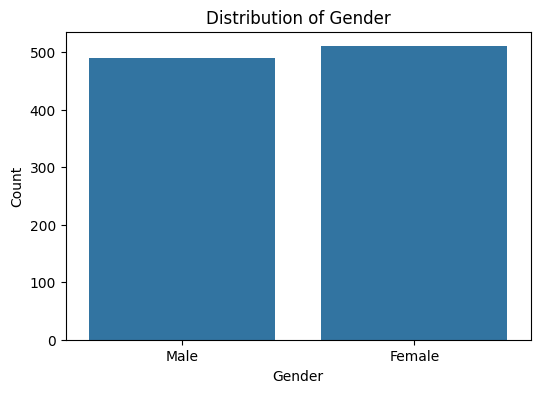

In [132]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show() 


**The female dominates the population**

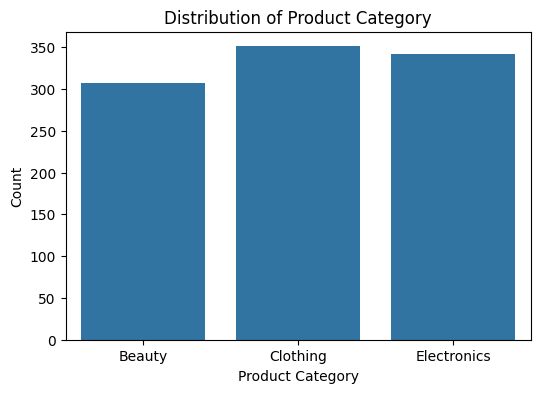

In [133]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Product Category')
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Beauty', 'Clothing', 'Electronics'])
plt.show() 

**Clothing dominates the Product Category, follows by the Electronics, lastly the Beauty**

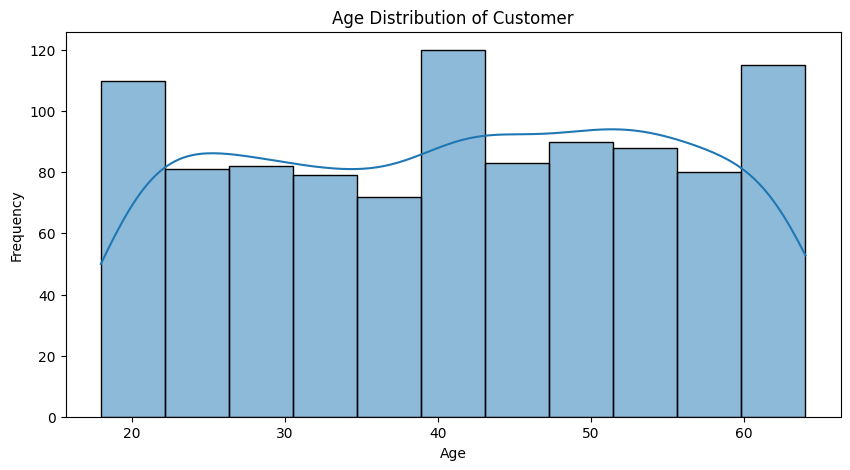

In [134]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution of Customer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### The age distribution appears approximately uniform to mildly skewed, indicating no strong deviation from normality

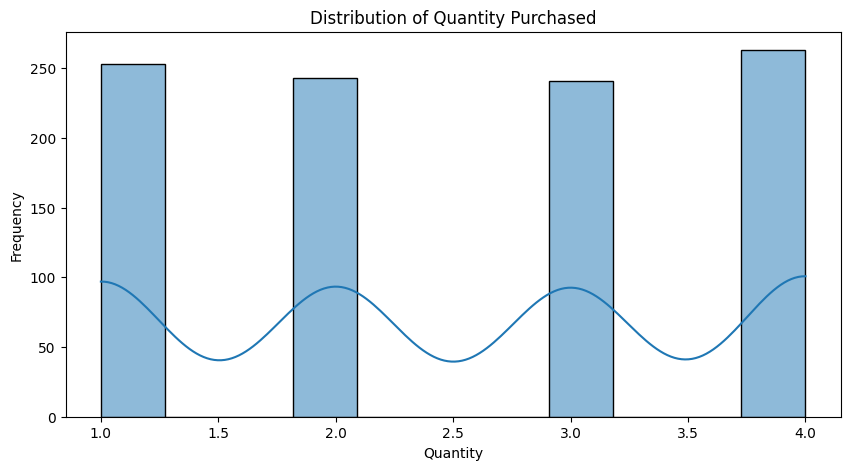

In [135]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Quantity', kde=True)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

### Quantity reveal a right-skewed distribution, with most purchases involving fewer items.

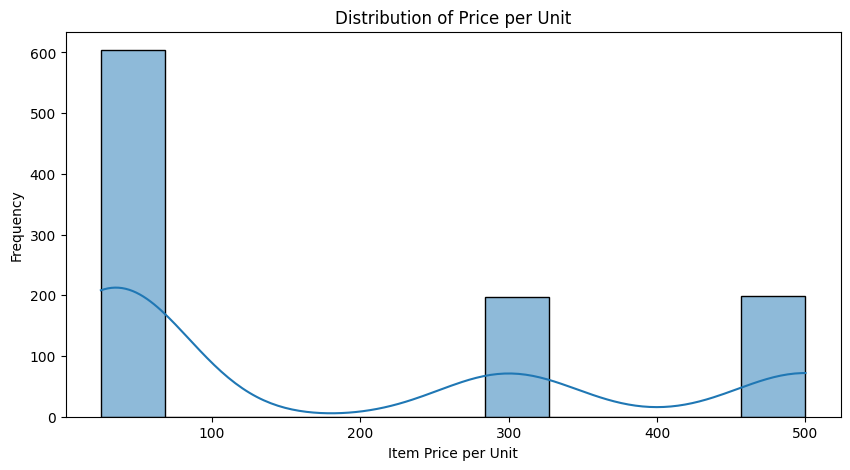

In [136]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Price per Unit', kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Item Price per Unit')
plt.ylabel('Frequency')
plt.show()

### Price per unit exhibits a positively skewed distribution due to a higher frequency of low-priced products.

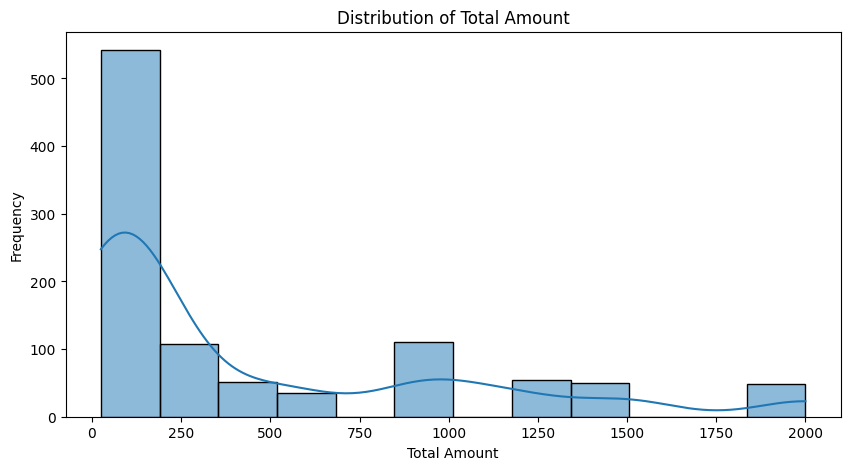

In [137]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Total Amount', kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

### Total Amount is positively skewed, indicating many low-value transactions and fewer high-value purchases.

<Figure size 800x500 with 0 Axes>

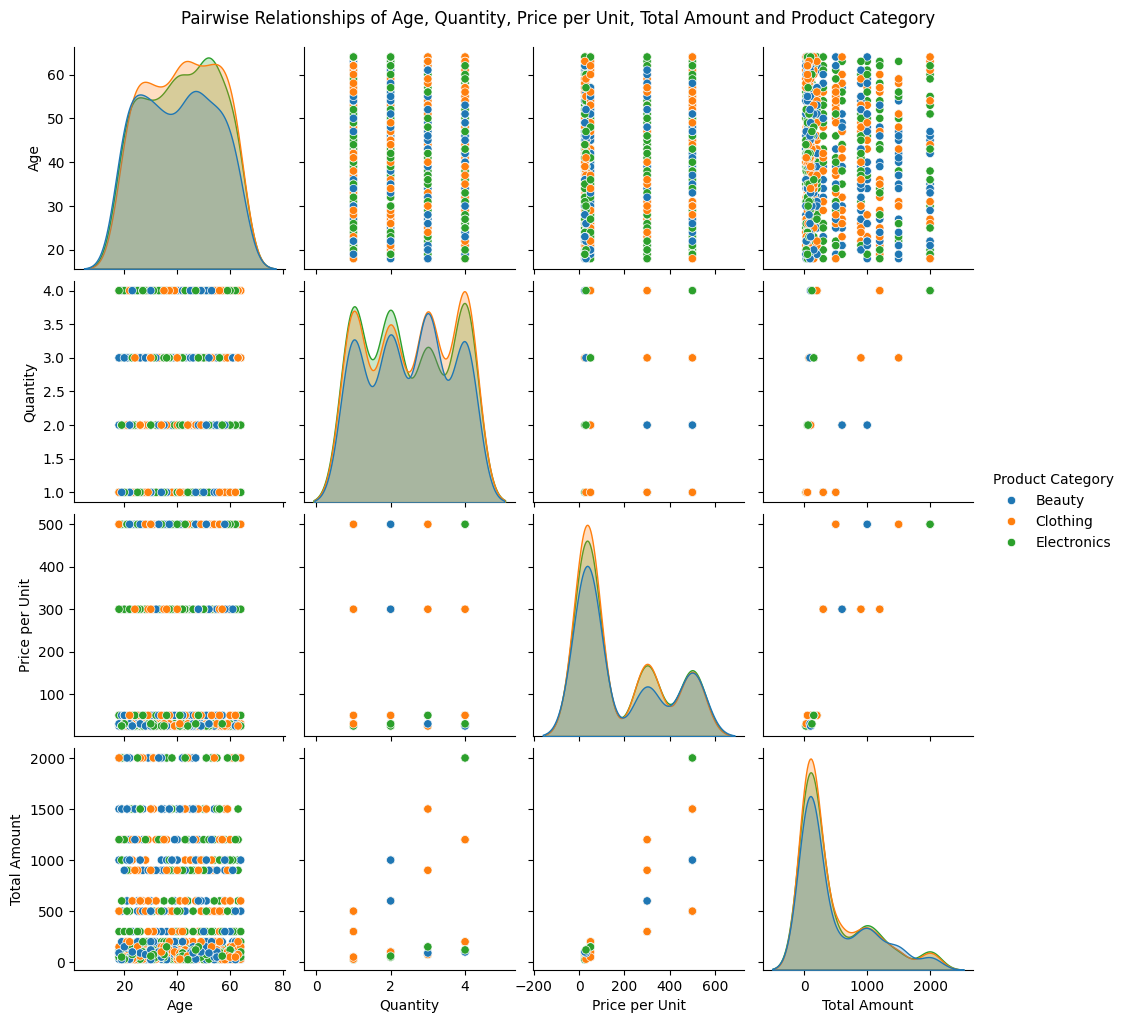

In [138]:
plt.figure(figsize=(8, 5))
sns.pairplot(df[['Age', 'Quantity','Price per Unit','Total Amount','Product Category']], hue='Product Category', diag_kind='kde')
plt.suptitle("Pairwise Relationships of Age, Quantity, Price per Unit, Total Amount and Product Category", y=1.02) # Adjust suptitle position
plt.show()


* # Report
### In this dataset, Quantity, Price per Unit, and Total Amount exhibit positive skewness, while Age shows a more evenly distributed pattern.

## Encoding categorical Variables


**I shall be encoding both Gender and product Category columns, before then; below are what they contain.** 

* They are under Nominal variables, so we shall use **One-Hot Encoding for Gender.**
* **while, I use label encoding** for Product Category(as the target)

In [139]:
print(df['Gender'].value_counts().head(10))

Gender
Female    510
Male      490
Name: count, dtype: int64


In [140]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [141]:
print(df['Product Category'].value_counts().head(10))

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


In [142]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [143]:

df_encoded = df.copy()
from sklearn.preprocessing import OneHotEncoder
df_one_hot = df.copy()
one_hot_encoder = OneHotEncoder(sparse_output=False)
encode_features = one_hot_encoder.fit_transform(df_encoded[['Gender']])

ohe_df = pd.DataFrame(
    encode_features,
    columns=one_hot_encoder.get_feature_names_out(['Gender'])
)

df_one_hot = pd.concat([df_encoded, ohe_df], axis=1)
df_one_hot.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.0,1.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1.0,0.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.0,1.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.0,1.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0.0,1.0


## Encoding Product Category via Label Encoder

In [144]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded['Product Category_label_encoded'] = label_encoder.fit_transform(df_encoded['Product Category'])

for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")
    


Beauty: 0
Clothing: 1
Electronics: 2


In [145]:
display(df_encoded[['Product Category', 'Product Category_label_encoded']].sample(10))

,Product Category,Product Category_label_encoded
919,Beauty,0
799,Clothing,1
860,Clothing,1
455,Electronics,2
27,Beauty,0
61,Beauty,0
652,Clothing,1
726,Beauty,0
5,Beauty,0
43,Clothing,1


In [146]:
df_encoded.head() 

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


## Convariance

In [147]:
numeric_df = df_encoded.select_dtypes(include=['number'])
numeric_df.cov()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
Transaction ID,83416.666667,257.599600,-8.709710,-3332.852853,-12135.915916,7.537037
Age,257.599600,187.181518,-0.367856,-99.711592,-464.046046,0.431712
Quantity,-8.709710,-0.367856,1.283087,3.760300,237.053053,-0.010000
Price per Unit,-3332.852853,-99.711592,3.760300,35979.016917,90492.402402,-0.591742
Total Amount,-12135.915916,-464.046046,237.053053,90492.402402,313597.347347,-2.572573
Product Category_label_encoded,7.537037,0.431712,-0.010000,-0.591742,-2.572573,0.648423


In [148]:
correlation_matrix = numeric_df.corr()
correlation_matrix

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Product Category_label_encoded
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034,0.032407
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568,0.039186
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707,-0.010963
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925,-0.003874
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000,-0.005705
Product Category_label_encoded,0.032407,0.039186,-0.010963,-0.003874,-0.005705,1.000000


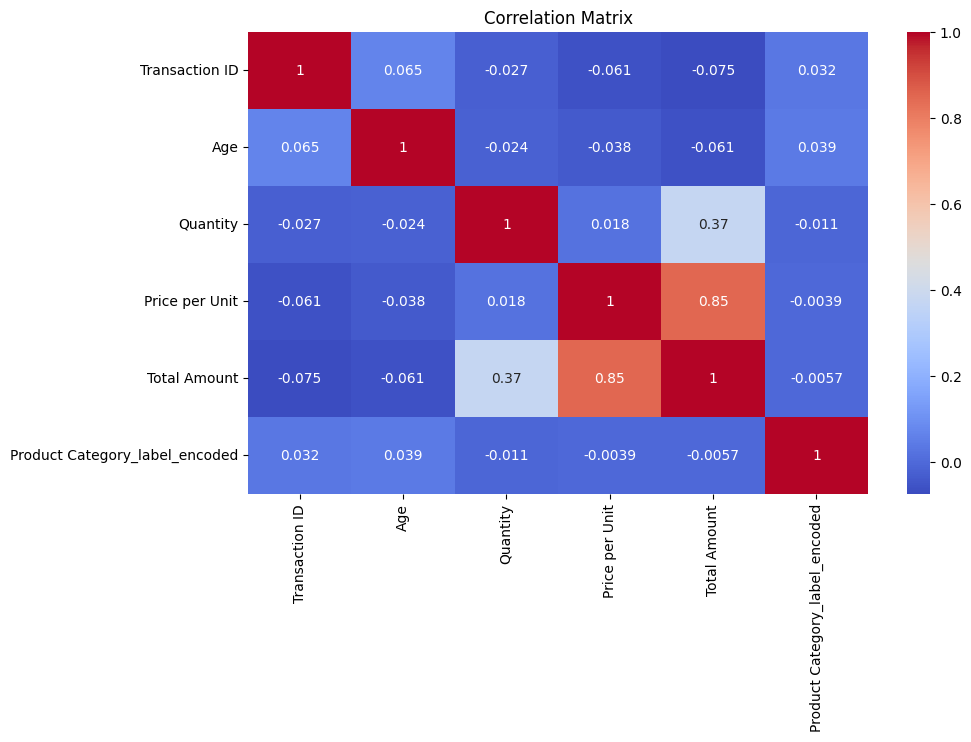

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

### The Price per Unit has a strong correlation with the Total amount

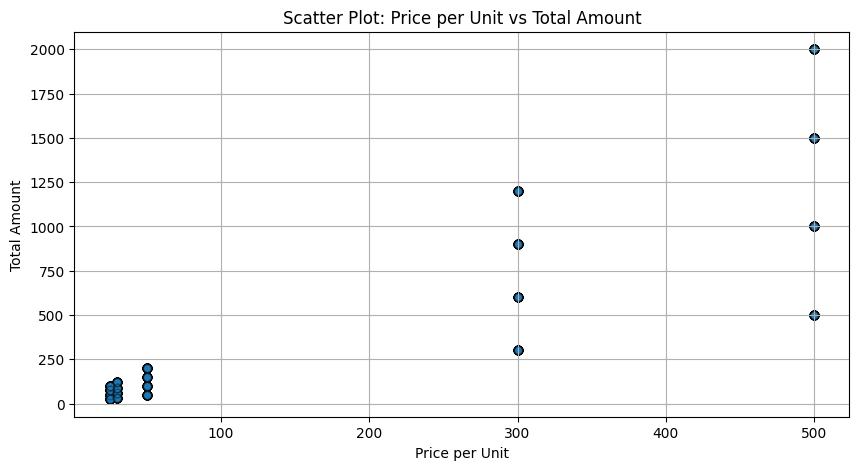

In [150]:
# Create the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(df['Price per Unit'], df['Total Amount'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot: Price per Unit vs Total Amount')
plt.xlabel('Price per Unit')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

## It shows that as the price per unit of items increases, the Total Amount aslo increases.

# **Simple Regression Model**

In [151]:
# Define features (X) and target (y)
X = df[['Price per Unit']]  # Features - note the double brackets to keep it as DataFrame
y = df['Total Amount']  # Target

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [152]:
model = LinearRegression() 
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [153]:
slope = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)

print(f"The Slope is: {slope}")
print(f"The Intercept is: {intercept}")

The Slope is: 2.52
The Intercept is: 3.55


In [154]:
y_pred = model.predict(X)

print(y_pred)

[ 129.30796794 1261.12269137   79.00509134 1261.12269137  129.30796794
   79.00509134   66.4293722    66.4293722   758.0939254   129.30796794
  129.30796794   66.4293722  1261.12269137   79.00509134 1261.12269137
 1261.12269137   66.4293722    66.4293722    66.4293722   758.0939254
 1261.12269137  129.30796794   79.00509134  758.0939254   129.30796794
 1261.12269137   66.4293722  1261.12269137   79.00509134  758.0939254
  758.0939254    79.00509134  129.30796794  129.30796794  758.0939254
  758.0939254    66.4293722   129.30796794   79.00509134  129.30796794
   66.4293722   758.0939254   758.0939254    66.4293722    79.00509134
  758.0939254  1261.12269137  758.0939254  1261.12269137   66.4293722
   66.4293722   758.0939254   129.30796794 1261.12269137   79.00509134
  758.0939254    79.00509134  758.0939254   129.30796794  129.30796794
  129.30796794  129.30796794   66.4293722    66.4293722  1261.12269137
   79.00509134  758.0939254   758.0939254    66.4293722   758.0939254
   66.42937

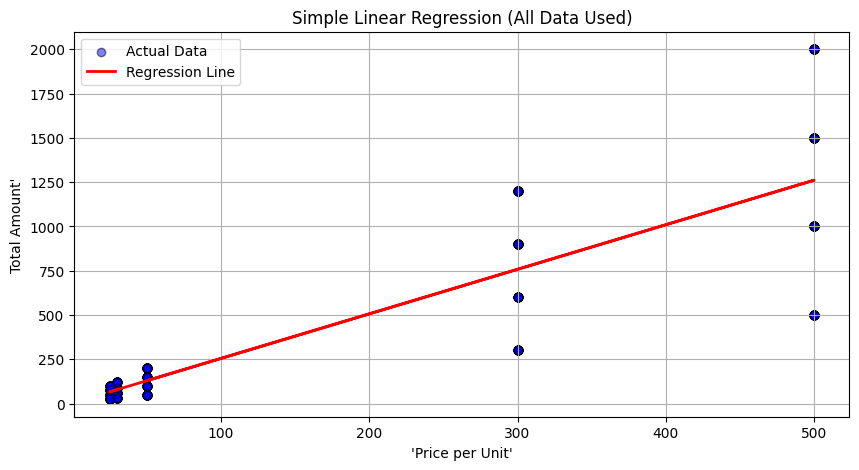

In [155]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.5, edgecolor='k',color='blue', label='Actual Data')

plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("'Price per Unit'")
plt.ylabel("Total Amount'")
plt.title("Simple Linear Regression (All Data Used)")
plt.legend()
plt.grid(True)
plt.show()


**NB:**
* There is no need for multiple regression since the target is categorical (after encoding) having values 0,1,and 2. Thus, making it a multiclass classification rather a linear regression. We can use Logistic Regression model, Random Forest Classifier because they handles multiclass targets inherently and captures non-linear relationships better than basic Logistic Regression.

# **LOGISTIC REGRESSION**

In [156]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [157]:
X = df_encoded.drop("Product Category", axis=1)
y = df_encoded["Product Category_label_encoded"]

In [158]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(label_encoder.classes_)

[0 1 2]


In [159]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [160]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

In [161]:
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(
            multi_class="multinomial",
            solver="lbfgs",
            max_iter=1000
        ))
    ]
)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [163]:
y_train_pred = pipeline.predict(X_train)
print(y_train_pred[:10])

[1 0 2 1 1 1 0 2 2 2]


In [164]:
results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print("Actual vs Predicted values:")
display(results_df.head())

Actual vs Predicted values:


,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [165]:
y_test_pred = pipeline.predict(X_test)
print(y_test[:10])

[0 0 2 1 0 0 2 0 1 1]


In [166]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("Actual vs Predicted values:")
display(results_df.head())

Actual vs Predicted values:


,Actual,Predicted
0,0,0
1,0,0
2,2,2
3,1,1
4,0,0


## Evaluation metrics
* **Accuracy Score**

In [167]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Interpretation:**

* Percentage of correctly classified product categories.

### Confusion Matrix

In [168]:
print(f"\nConfusion Matrix (Train Set):")
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)


Confusion Matrix (Train Set):
[[245   0   0]
 [  0 281   0]
 [  0   0 274]]


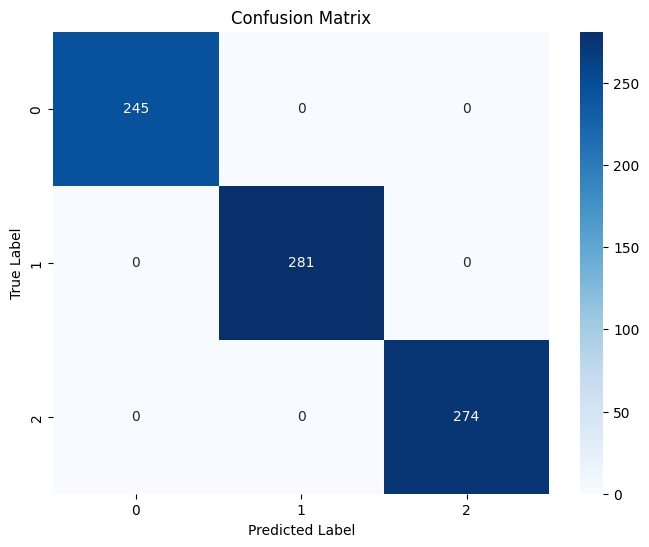

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [170]:
print(f"\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Confusion Matrix (Test Set):
[[62  0  0]
 [ 0 70  0]
 [ 0  0 68]]


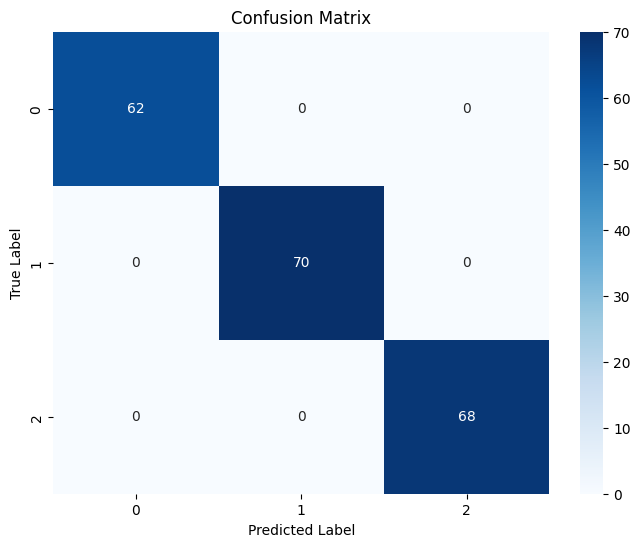

In [171]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretation:

Rows → actual class

Columns → predicted class

Diagonal → correct predictions

## Model interpretation (Logistic Regression)

In [172]:
model = pipeline.named_steps["model"]

## Feature names after preprocessing

In [173]:
feature_names = (
    numerical_features.tolist() +
    pipeline.named_steps["preprocessing"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
    .tolist()
)

In [174]:
coef_df = pd.DataFrame(
    model.coef_,
    columns=feature_names,
    index=label_encoder.classes_
)
coef_df.style.background_gradient(cmap="YlGnBu").format("{:.2f}")

## Interpretation:
Positive coefficient → increases likelihood of that category

Negative coefficient → decreases likelihood

## Conclusion:
After the implementation of  a multinomial logistic regression model using a pipeline to avoid data leakage. The target variable (Product Category) was label-encoded, while input categorical features were one-hot encoded. The model achieved an accuracy of 1%, with strong precision and recall across most categories. 

Therefore, Feature coefficients show that numerical variables such as price and quantity significantly influence category prediction.